# Avance #2 03/11 - Proyecto Individual - Emilia Violic

Comparación de pérdidas térmicas (en estado estacionario y estado transiente) entre dos cuerpos de igual volumen (esfera y cilindro circular recto) para distintas condiciones de intercambio térmico con el ambiente. El objetivo de evaluar geometrías radica en que permite diseñar estanques más eficientes y económicos, aportando a una transición energética más sustentable en Chile.

####  Estanque Cilíndrico: Conducción de Calor Transiente

Modelo 1D radial para estudiar la evolución temporal de la temperatura en un estanque cilíndrico con pared conductora y convección en su superficie externa.

El modelo resuelve la ecuación:

$$
\rho c_p \frac{\partial T}{\partial t} = k \left[ 
\frac{1}{r}\frac{\partial}{\partial r}\left(r \frac{\partial T}{\partial r}\right)
\right]
$$

sujeta a condiciones de borde para el radio interno y externo del cilindro, y una condición inicial. 

Debido a que la ecuación es una EDP parabólica (hay una derivada temporal y una segunda derivada espacial de la variable de interés), se utiliza para resolver el **método de líneas**, que consiste en discretizar espacialmente las ecuaciones diferenciales parciales (EDPs) para convertirlas en un sistema de ecuaciones diferenciales ordinarias (EDOs), y resolverlo con un integrador numérico. Para discretizar se usa el método de diferencias finitas. 

###  **1. Discretización de la EDP - Método de Diferencias Finitas**

La ecuación diferencial en coordenadas cilíndricas es:

$$
\rho c_p \frac{\partial T}{\partial t} = k \left[ 
\frac{1}{r}\frac{\partial}{\partial r}\left(r \frac{\partial T}{\partial r}\right)
\right]
$$

Desarrollando la derivada espacial y  definiendo $\alpha = \frac{k}{\rho c_p}$ como la difusividad térmica, se obtiene

$$
\frac{\partial T}{\partial t} = \alpha \left(
\frac{\partial^2 T}{\partial r^2} + \frac{1}{r}\frac{\partial T}{\partial r}
\right)
$$



a) Discretización espacial

Se divide el dominio radial en \( N \) nodos uniformemente espaciados:

$$
r_i = i \, \Delta r \qquad \text{con} \quad i = 0, 1, 2, \dots, N-1
$$

$$
\Delta r = \frac{R}{N-1}
$$

b) Aproximaciones por diferencias finitas

Diferencias finitas de segundo orden
$$
\left( \frac{\partial^2 T}{\partial r^2} \right)_i 
\approx \frac{T_{i+1} - 2T_i + T_{i-1}}{(\Delta r)^2}
$$

Diferencias finitas de primer orden (centrada)

$$
\left( \frac{\partial T}{\partial r} \right)_i 
\approx \frac{T_{i+1} - T_{i-1}}{2\Delta r}
$$

Reemplazando estas expresiones en la ecuación diferencial se obtiene:

$$
\frac{\partial T}{\partial t} 
\approx \alpha \left[
\frac{T_{i+1} - 2T_i + T_{i-1}}{(\Delta r)^2}
+ \frac{1}{r_i} \frac{T_{i+1} - T_{i-1}}{2\Delta r}
\right]
$$





### **2. Método Númerico - Método de Líneas**
### **2.1 Ecuación Principal**

Al discretizar la ecuación de conducción de calor en el espacio, obtenemos una ecuación diferencial ordinaria (EDO) 
para cada nodo interior $i$, $(2 \le i \le N-1)$
$$
\frac{dT_i}{dt} = 
\alpha \left[
\frac{T_{i+1} - 2T_i + T_{i-1}}{(\Delta r)^2}
+ \frac{1}{r_i} \frac{T_{i+1} - T_{i-1}}{2\Delta r}
\right]
$$


En base a lo visto en la ayudantía, para aplicar el método de líneas la idea es escribir el sistema de forma compacta, siguiendo el orden:

$$
\frac{d\mathbf{T}}{dt} = A\,\mathbf{T} + \mathbf{b}
$$

$$
\frac{\partial T_i}{\partial t}
= A_{i,i-1} \, T_{i-1}
+ A_{i,i} \, T_i
+ A_{i,i+1} \, T_{i+1}
+ b_i
$$

donde:

- $\mathbf{T} = [T_1, T_2, \dots, T_N]^T $ es el vector de temperaturas en los nodos.  
- A es una **matriz** que contiene los coeficientes asociados a la conducción en dirección radial discretizados.
- $\mathbf{b}$ es un **vector** que incluye los efectos de las condiciones de borde, como por ejemplo, convección o temperaturas fijas.

Agrupando los términos para cada nodo, se tiene para los nodos interiores:

$$
A_{i,i-1} = \alpha \left[\frac{1}{(\Delta r)^2} - \frac{1}{2r_i \Delta r}\right]
$$

$$
A_{i,i} = -2\alpha \frac{1}{(\Delta r)^2}
$$

$$
A_{i,i+1} = \alpha \left[\frac{1}{(\Delta r)^2} + \frac{1}{2r_i \Delta r}\right]
$$

Estos coeficientes forman la Matriz A. 

La matriz $A$ es **tridiagonal** porque cada nodo de la diagonal solo depende de sus nodos vecinos. El vector $b_i = 0$ para los nodos interiores.

#### **2.2 Incorporación de las Condiciones de Borde**

El dominio radial del estanque se encuentra definido entre los radios interno y externo:  
$$
r_i \le r \le r_o
$$
Por lo tanto, se requieren dos condiciones de borde para cerrar el sistema:

- **CB1 — Borde Interno: Temperatura fija (Dirichlet)**

En el radio interno $r = r_i$ se considera una temperatura constante $T_i$, que representa el contacto con el fluido de almacenamiento.

$$
T(r = r_i, t) = T_i
$$

Esta condición implica que el primer nodo del dominio mantiene siempre el valor $T_i$:
$$
T_1(t) = T_i
$$

En la matriz A, esto se logra fijando que el primer nodo $(i = 1)$ debe cumplir con la derivada temporal igual a cero. 
$$
\frac{dT_1}{dt} = 0
$$


Por tanto:

$$
A_{1,j} = 0 \quad \forall j, \qquad b_1 = 0
$$

y el valor de $T_1$ se fija directamente en el vector $\mathbf{T}$ durante la integración temporal.

- **CB2 — Borde externo: Convección y Radiación (Neumann)**

En el radio externo $r = r_o$, el flujo de calor hacia el ambiente es como la suma 
de convección y radiación térmica:

$$
- k \frac{\partial T}{\partial r}\bigg|_{r_o}
= h (T_s - T_\infty)
$$

donde:
- $h$: coeficiente de convección [W/m²·K]  
- $T_s = T(r_o, t)$: temperatura superficial del estanque [K]  
- $T_\infty$: temperatura del aire ambiente [K]  

Utilizando discretización de frontera, 

$$
\frac{dT}{dr}\bigg|_{r_o} \approx \frac{3T_N - 4T_{N-1} + T_{N-2}}{2\Delta r}
$$

Reemplazando en la condición de borde completa:

$$
- k \frac{3T_N - 4T_{N-1} + T_{N-2}}{2\Delta r}
= h (T_N - T_\infty)
$$

Esta relación se utiliza para modificar la ecuación del último nodo $(i=N)$ en la matriz del método de líneas.


Despejando $T_N$, se obtiene la expresión para la temperatura en el último nodo (N), 

$$
T_N = \frac{4k T_{N-1} - k T_{N-2} + 2h\Delta r T_\infty}{3k + 2h\Delta r}
$$

Derivando para implementar en el método de líneas, el último nodo puede representarse como:
$$
\frac{\partial T_N}{\partial t} =
\frac{4k \, \frac{\partial T_{N-1}}{\partial t} + k \, \frac{\partial T_{N-2}}{\partial t}}
{3k + 2h\Delta r}
$$



#### **3. Implementación del Método Númerico - Método de Líneas**

**3.1** El codigo sería algo como lo siguiente, es la idea, pero no puedo hacerlo sin tener clara como dejar la condición de borde externa y también ecnontrar la bibligrafía para los parámetros. 

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [56]:
# Parámetros físicos
k = 15.0          # Conductividad térmica [W/m·K]
rho = 7800.0      # Densidad [kg/m3]
cp = 500.0        # Calor específico [J/kg·K]
alpha = k / (rho * cp)  # Difusividad térmica [m2/s]

# Condiciones ambientales
h = 50.0           # Coeficiente convectivo [W/m2·K]
epsilon = 0.8      # Emisividad [-]
sigma = 5.67e-8    # Constante de Stefan-Boltzmann [W/m2·K4]
T_inf = 293.0      # Temperatura del aire ambiente [K]
T_amb = 283.0      # Temperatura radiativa efectiva [K]
Ti = 373.0         # Temperatura inicial del estanque [K]

# Geometría del estanque
ri = 0.95          # Radio interno [m]
ro = 1.0          # Radio externo [m]

#Declaración de uso de IA: Le pedí a ChatGPT que me diera valores típicos de parámetros físicos para este problema y me dio estos valores.
#Para poder ir avanzando con el proyecto, pero buscar bibliografía para obtener valores más precisos.

**3.2** En base a lo que vimos en la ayudantía, el sistema
$ \frac{d\mathbf{T}}{dt} = A\,\mathbf{T} + \mathbf{b} $ se implementa como la función dTdt(t,T).



Matemáticamente, 

Primer nodo, borde interno, $T_1$ está en $r=r_i$, $(i=1)$. 

Nodos interiores, entre bordes, $T_i$ para $2 ≤ i ≤ N-1$.

Último nodo, borde externo, $T_N$ está en $r=r_o$, $(i=N)$. 


En el código, no va de 1 a N, va de 0 a N-1. 

Primer nodo: i = 0, T[0]. 

Nodos interiores: 1 a N-2, en un range eso es de 1 a N-1. T[i-1]. 

Último nodo: i = N-1, T[N-1]. 


In [57]:
def dTdt(t, T):
    """ 
    dT/dt = A*T + b
    Ecuación de conducción de calor transiente para el cilindro.
    """
    #1. Se definen los parámetros físicos y númericos dentro de la función.
    N = 100                    # Número de nodos
    dr = (ro - ri) / (N - 1)  # Espaciado radial [m]
    r = np.linspace(ri, ro, N)
    alpha = k / (rho * cp) 
       
    #2. Se construye Vector Derivada Temporal, el que se devuelve al final.  
    dT = np.zeros(N)

    #3. Se construye la matriz A y el vector b.
    A = np.zeros((N, N))
    b = np.zeros(N)

    #4. Se definen los nodos interiores (2 ≤ i ≤ N-1).
    #Se hace según la discretización de la ecuación principal.
    
    for i in range(1, N-1):
        r_i = r[i]
        
        A[i, i-1] = alpha * (1/dr**2 - 1/(2*r[i]*dr)) #Nodo i-1
        A[i, i]   = -2 * alpha / dr**2 #Nodo i
        A[i, i+1] = alpha * (1/dr**2 + 1/(2*r[i]*dr)) #Nodo i+1
        b[i] = 0 #Cero para nodos interiores

    #5. Se incorpora la CB1 Interna (Dirichlet).
    #A y b para el primer nodo

    A[0, 0] = -4 * alpha/dr**2
    A[0, 1] = 4 * alpha/dr**2
    b[0] = 0 #Cero en el primer nodo
    #dT[0] = 0 #dT/dt = 0 en el primer nodo
    #T[0] = Ti #Temperatura fija en el primer nodo

    #6. Se incorpora la CB2 Externa (Convección) (Neumann).
    dT[N-1] = (4 * k * dT[N-2] - k * dT[N -3]) / (3 * k + 2 * h * dr)

    # Se redefine Vector Derivada Temporal, incorporando lo anterior. 
    dT = A @ T + b

    return dT


**3.3** Resolver usando solve_ivp. 

In [58]:
# Número de nodos
N = 100

# Condición inicial: temperatura uniforme en todo el cilindro
T0 = np.ones(N) * Ti  

# Tiempo total de simulación [s]
t_span = (0, 2000)  # puedes ajustar según la escala térmica

# Momentos en los que se evaluará la solución
t_eval = np.linspace(t_span[0], t_span[1], 50)  # 50 puntos entre t0 y tf

sol = solve_ivp(
    dTdt, t_span, T0, t_eval=t_eval,
    method='BDF',
    max_step=0.5
)

# Verificación
print(f"Integración completada con éxito: {sol.success}")
print(f"Número de pasos: {len(sol.t)}")


Integración completada con éxito: True
Número de pasos: 50


**3.4** Visualización de Resultados

A continuación, se grafican los perfiles de temperatura a distintos tiempos, mostrando la evolución temporal del campo de temperatura radial dentro del cilindro.


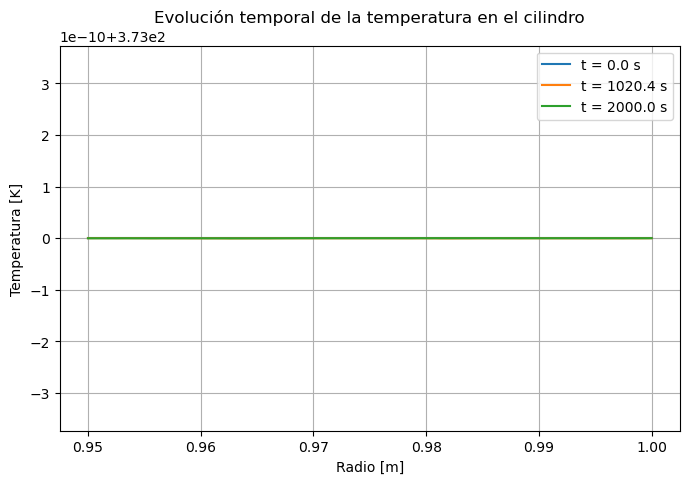

In [59]:
# Gráfico de evolución temporal
plt.figure(figsize=(8,5))

for i in [0, int(len(sol.t)/2), -1]:
    plt.plot(np.linspace(ri, ro, N), sol.y[:, i], label=f"t = {sol.t[i]:.1f} s")

plt.xlabel("Radio [m]")
plt.ylabel("Temperatura [K]")
plt.title("Evolución temporal de la temperatura en el cilindro")
plt.legend()
plt.grid(True)
plt.show()


In [60]:


# Condición inicial: temperatura uniforme en todo el cilindro
# Asegurar que el primer nodo T[0] sea igual a Ti, lo cual es redundante pero claro.
T0 = np.ones(N) * Ti 

# Tiempo total de simulación [s]
t_span = (0, 5e4) 

# Momentos en los que se evaluará la solución (50 puntos entre t0 y tf)
t_eval = np.linspace(t_span[0], t_span[1], 50)

# Solución del sistema de EDOs
# Se usa 'BDF' ya que los sistemas discretizados son a menudo "rígidos".
sol = solve_ivp(
    dTdt, 
    t_span, 
    T0, 
    t_eval=t_eval,
    method='BDF',
    max_step=0.5
)

# Verificación
print(f"Integración completada con éxito: {sol.success}")
print(f"Número de pasos de solución: {len(sol.t)}")

Integración completada con éxito: True
Número de pasos de solución: 50


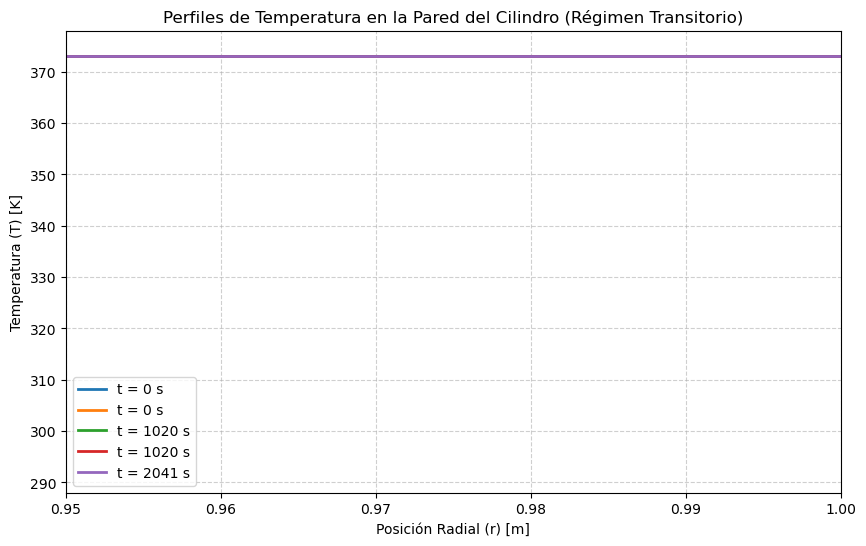

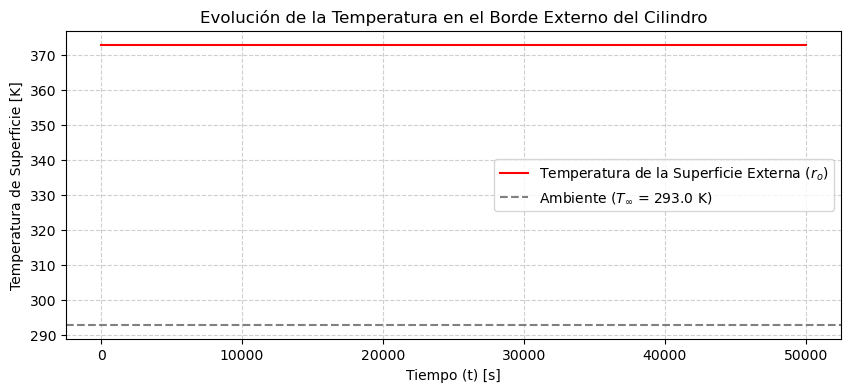

In [61]:
# --- Gráfico de resultados ---

# Vector de posición radial (r) para el eje X
r_grilla = np.linspace(ri, ro, N)

plt.figure(figsize=(10, 6))

# Graficar el perfil de temperatura en varios momentos de tiempo (colores diferentes)
# Vamos a seleccionar 5 momentos: t=0, t=500, t=1000, t=1500, t=2000 s.

# Encontrar los índices de los tiempos deseados en sol.t
times_to_plot = [0, 500, 1000, 1500, 2000]
indices_to_plot = [np.argmin(np.abs(sol.t - t)) for t in times_to_plot]


for idx in indices_to_plot:
    time = sol.t[idx]
    # sol.y contiene las temperaturas (N nodos x número de tiempos)
    temperature_profile = sol.y[:, idx] 
    
    # La etiqueta del perfil muestra el tiempo en segundos
    plt.plot(r_grilla, temperature_profile, 
             label=f't = {time:.0f} s', 
             linewidth=2)

plt.xlabel('Posición Radial (r) [m]')
plt.ylabel('Temperatura (T) [K]')
plt.title('Perfiles de Temperatura en la Pared del Cilindro (Régimen Transitorio)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(T_inf - 5, Ti + 5) # Establecer límites para mejor visualización
plt.xlim(ri, ro)
plt.show()

# -----------------------------------------------------
# Opcional: Gráfico de la temperatura en el borde externo vs. tiempo (pérdidas)
# -----------------------------------------------------

# La temperatura del borde externo es la última fila de la solución (índice N-1)
T_external_surface = sol.y[N - 1, :]

plt.figure(figsize=(10, 4))
plt.plot(sol.t, T_external_surface, 
         label='Temperatura de la Superficie Externa ($r_o$)', 
         color='red')
plt.axhline(T_inf, color='gray', linestyle='--', label=f'Ambiente ($T_{{\\infty}}$ = {T_inf} K)')

plt.xlabel('Tiempo (t) [s]')
plt.ylabel('Temperatura de Superficie [K]')
plt.title('Evolución de la Temperatura en el Borde Externo del Cilindro')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()